In [1]:
import os
import sys
import argparse
sys.path.append("../..")
sys.path.append("../../..")
from lib.logging import print_msg
from lib.read_data import data_read

def load_data(path):
    print(path)
    data = {}
    for pkl_name in sorted(os.listdir(path)):
        if ".pkl" in pkl_name:
            print(pkl_name)
            data[int(pkl_name.split(".pkl")[0])] = data_read(path, pkl_name)
    return data

result_path = "../../workload_manage/five_workloads_3/result"

data = {}

for workload_name in sorted(os.listdir(result_path)):
    print(workload_name)
    if workload_name.startswith("workload"):
        data[workload_name] = {}


        for run_name in ["bf", "gd"]:
#         for run_name in ["gd"]:
            if run_name == "gd":
                result_search_path_temp = os.path.join(result_path, workload_name, run_name)
                for timeout_name in sorted(os.listdir(result_search_path_temp)):
                    if "_" in timeout_name and timeout_name == "5_5":
                        result_search_path = os.path.join(result_search_path_temp, timeout_name)
                        data[workload_name][f"gd_{timeout_name}"] = load_data(result_search_path)
            else:
                result_search_path = os.path.join(result_path, workload_name, run_name)
                data[workload_name][run_name] = load_data(result_search_path)

workload_1
../../workload_manage/five_workloads_3/result/workload_1/bf
10.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 10.pkl
[success]
12.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 12.pkl
[success]
14.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 14.pkl
[success]
16.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 16.pkl
[success]
2.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 2.pkl
[success]
24.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 24.pkl
[success]
4.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 4.pkl
[success]
6.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 6.pkl
[success]
8.pkl
[load output] ../../workload_manage/five_workloads_3/result/workload_1/bf 8.pkl
[success]
../../workload_manage/five_workloads_3/result/workload_

workload_1 bf
2 300
4 300
6 300
8 300
10 300
12 33
14 1
16 4
24 1
[0.006523, 0.0173, 0.202146, 4.329034, 182.62568]
workload_2 bf
2 300
4 300
6 300
8 300
10 300
12 300
14 300
16 300
18 300
20 300
22 300
24 300
[0.006353999999999999, 0.029051999999999998, 0.08359699999999999, 0.985639, 0.507331, 4.312944, 25.845360000000003, 22.477119000000002, 35.325074, 68.86525499999999, 183.86378000000002, 552.892544]
workload_4 bf
2 300
4 300
6 300
8 300
10 300
12 300
14 300
16 300
18 300
20 300
22 300
24 300
[0.008565, 0.013274, 0.029298, 0.38137699999999997, 7.702141, 12.594530999999998, 11.497253, 76.45227899999999, 331.446279, 1896.994963, 2046.547631, 2764.277587]
workload_5 bf
2 300
4 300
6 300
8 300
10 300
12 300
14 300
16 300
18 300
20 82
22 58
24 3
[0.006165, 0.01883, 0.09255, 0.40008200000000005, 1.9617120000000001, 58.290040999999995, 451.830099, 17312.641348, 3377.570913]
workload_1 gd_5_5
2 300
[0.093814, 0.09096599999999999, 0.082381, 0.07991700000000002, 0.06867699999999999, 0.082616

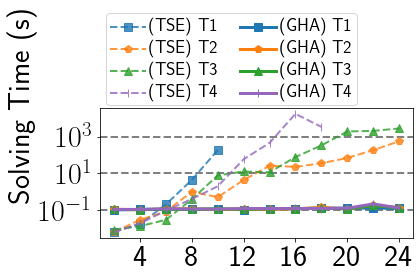

In [6]:

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'

fig, ax = plt.subplots(figsize=(6, 4))

for run_name in ["bf", "gd_5_5"]:
    for workload in ["workload_1", "workload_2", "workload_4", "workload_5"]:
        print(workload, run_name)

        if run_name == "bf":
            key_list = sorted(data[workload][run_name].keys())
        else:
            key_list = [i for i in range(2, 25, 2)]
        # print(key_list)
        plot_data = []
        actual_key_list = []
        min_list = []
        max_list = []
        
        for key in key_list:
            list_data = data[workload][run_name][key]["time"]
            # if run_name == "bf":
            print(key, len(list_data))
            if len(list_data) == 300:
                actual_key_list.append(key)
                # plot_data.append(max(list_data))
                import statistics
                # print(list_data)
                # plot_data.append(statistics.median(list_data))
                if run_name != "bf":
                    print(list_data)
                plot_data.append(max(list_data))
        if workload == "workload_1":
            workload_name = "T1"
            marker = markerst1
            color='C0'
        if workload == "workload_2":
            workload_name = "T2"
            marker = markerst2
            color='C1'
        if workload == "workload_3":
            workload_name = "T3"
            marker = markerst3
            color='C2'
        if workload == "workload_4":
            workload_name = "T3"
            marker = markerst3
            color='C2'
        if workload == "workload_5":
            workload_name = "T4"
            marker = markerst5
            color='C4'


        if run_name == "bf":
            label = f"(TSE) {workload_name}"
#             color = "C17"
            linestyle = '--'
            alpha = 0.8
            linewidth=2
        
        elif run_name == "gd_5_5":
            label = f"(GHA) {workload_name}"
#             color = "black"
            linestyle = '-'
            alpha = 1
            linewidth=3

        else:
            label = f"(gd0) {workload_name}"
            color = "C2"
        ax.plot(actual_key_list, plot_data, label=label, color=color, marker=marker, alpha=alpha, linestyle=linestyle, linewidth=linewidth, markersize=8)
        print(plot_data)
        # ax.errorbar(actual_key_list, plot_data, label=label, color=color, marker=marker, yerr=[min_list, max_list])
        # ax.errorbar(actual_key_list, max_list, label=label, color=color)
        # print("avg", plot_data)
        # print("max", max_list)
        # break
    # break

key_list = [i*2 for i in range(1, 16)]

ax.tick_params(axis='y', labelsize=20)
# ax.set_xticks(key_list)
# ax.set_xticklabels(key_list, fontsize=20)
plt.xticks(fontsize=30)
# ax.set_xlabel('Number of sketch instances', fontsize=20)

plt.yscale("log")
# ax.set_ylim([0, 1000000])
ax.set_ylabel('Solving Time (s)', fontsize=30)

# ax.tick_params(axis='y', labelsize=30)

new_x = [4, 8, 12, 16, 20, 24]
new_x_label = [4, 8, 12, 16, 20, 24]

ax.set_xticks(new_x)
ax.set_xticklabels(new_x_label, fontsize=30)

# new_y = [0.1, 10, 1000, 100000, 10000000]
# new_y_label = ["$10^{-1}$", "$10^{1}$", "$10^{3}$", "$10^{5}$", "$10^{7}$"]

new_y = [0.1, 10, 1000]
new_y_label = ["$10^{-1}$", "$10^{1}$", "$10^{3}$"]

# new_y_label = ["0.1", "10", "1000", "100000"]
ax.set_yticks(new_y)
ax.set_yticklabels(new_y_label, fontsize=30)

# plt.rc('ytick', labelsize=35)

# plt.rcParams.update({'font.size':30})
# ax.set_yticklabels(fontsize=30)



plt.legend(loc='lower left', bbox_to_anchor=(0.02, 1.02, 1, 0.102), fontsize=18, ncol=2,
           columnspacing=1.2,
           handleheight=0.0,
           handletextpad=0.2,
           borderaxespad=0.0,
           labelspacing=0.2,
           borderpad=0.2)
plt.grid(color='gray', linestyle='--', linewidth=2, axis='y')
ax.yaxis.set_label_coords(-0.2,1.02)
fig.tight_layout()


# latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
latex_path = "."
full_path = os.path.join(latex_path, "greedy_time.pdf")
plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
plt.show()


workload_1 [2, 4, 6, 8, 10, 12, 14, 16, 24] 9
workload_1 2 30.503472222222236 30.503472222222236
workload_1 4 55.66979166666665 55.66979166666665
workload_1 6 80.98680555555562 80.98680555555562
workload_1 8 107.86319444444433 107.86319444444433
workload_1 10 139.7768518518519 139.77685185185192
plot_data [0.0, 0.0, 0.0, 0.0, -2.0333631108338234e-14] 5
workload_2 [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24] 12
workload_2 2 31.228124999999995 31.228124999999995
workload_2 4 56.28935185185183 56.28935185185183
workload_2 6 80.77569444444441 80.75219907407404
workload_2 8 100.528587962963 100.42083333333336
workload_2 10 121.22083333333327 121.08460648148142
workload_2 12 141.34606481481478 140.86203703703703
workload_2 14 159.92534722222217 159.29363425925928
workload_2 16 177.5927083333333 176.61631944444446
workload_2 18 193.15659722222222 191.27650462962958
workload_2 20 205.6158564814816 202.83391203703707
workload_2 22 225.08090277777768 221.48020833333322
workload_2 24 236.40902777

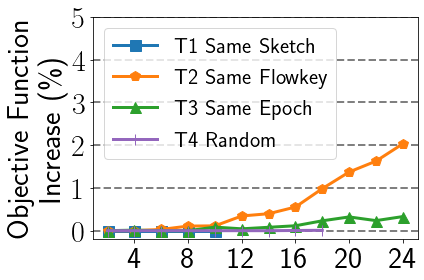

In [44]:

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'

fig, ax = plt.subplots(figsize=(6, 4))

# fig, ax = plt.subplots(figsize=(10, 10))


for workload in ["workload_1", "workload_2", "workload_4", "workload_5"]:
    key_list = sorted(data[workload]["bf"].keys())
    print(workload, key_list, len(key_list))

    plot_data = []
    actual_key_list = []
    min_list = []
    max_list = []
    for key in key_list:
        list_data = data[workload]["bf"][key]["time"]
        if len(list_data) == 300:
            actual_key_list.append(key)
            avg_resource = data[workload]["bf"][key]["mean_df"]["after"]
            bf_sum = sum(avg_resource)

            avg_resource = data[workload]["gd_5_5"][key]["mean_df"]["after"]
            gd_sum = sum(avg_resource)

            print(workload, key, gd_sum, bf_sum)
            plot_data.append((gd_sum - bf_sum)/bf_sum * 100)

    if workload == "workload_1":
        workload_name = "T1 Same Sketch"
        color = "C0"
        marker = markerst1
    if workload == "workload_2":
        workload_name = "T2 Same Flowkey"
        color = "C1"
        marker = markerst2
    if workload == "workload_3":
        workload_name = "T3"
        color = "C2"
        marker = markerst3
    if workload == "workload_4":
        workload_name = "T3 Same Epoch"
        color = "C2"
        marker = markerst3
    if workload == "workload_5":
        workload_name = "T4 Random"
        color = "C4"
        marker = markerst5
    print("plot_data", plot_data, len(plot_data))
    ax.plot(actual_key_list, plot_data, label=workload_name, color=color, marker=marker, markersize=11, linewidth=3)

key_list = [i*2 for i in range(1, 16)]

ax.tick_params(axis='y', labelsize=30)
# ax.set_xticks(key_list)
# ax.set_xticklabels(key_list, fontsize=20)
# plt.xticks(fontsize=20)
# ax.set_xlabel('Number of sketch instances', fontsize=20)


new_x = [4, 8, 12, 16, 20, 24]
new_x_label = [4, 8, 12, 16, 20, 24]

ax.set_xticks(new_x)
ax.set_xticklabels(new_x_label, fontsize=30)


# new_y = [0.0, 0.5, 1.0, 1.5, 2.0]
# new_y_label = [0.0, 0.5, 1.0, 1.5, 2.0]
# new_y_label = ["0.1", "10", "1000", "100000"]
# ax.set_yticks(new_y)
# ax.set_yticklabels(new_y_label, fontsize=25)




# plt.yscale("log")
ax.set_ylim([-0.2, 5])
ax.set_ylabel('Objective Function\nIncrease (\%)', fontsize=30)

from matplotlib.ticker import MultipleLocator
ax.yaxis.set_major_locator(MultipleLocator(1))

plt.legend(loc="upper left", fontsize=22, ncol=1)


# plt.legend(bbox_to_anchor=(0.19, 0.66), loc="center", fontsize=24, ncol=1,
#            handleheight=0.0,
#            handletextpad=0.2,
#            borderaxespad=0.0,
#            labelspacing=0.2,
#            borderpad=0.2)


plt.grid(color='gray', linestyle='--', linewidth=2, axis='y')
fig.tight_layout()

latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
# latex_path = "."
full_path = os.path.join(latex_path, "greedy_performance.pdf")
plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
plt.show()

In [31]:
for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
    print(workload)
#     for run_name in ["bf"]:
#         "bf"
#         "gd_5_5"
#     print(run_name)
    key_list = sorted(data[workload]["bf"].keys())
    print(key_list)
    for key in key_list:
        print("key", key)
        list_data = data[workload]["bf"][key]["time"]
        size = len(list_data)
        if size >= 30:
            avg_data = sum(list_data) / size
            max_data = max(list_data)
            print("bf:", size, max_data)
            
            list_data = data[workload]["gd_5_5"][key]["time"]
            size = len(list_data)
            avg_data = sum(list_data) / size
            max_data = max(list_data)
            print("gd:", size, max_data)
            print()

        


workload_1
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
key 2
bf: 300 0.008646000000000001
gd: 300 0.064917

key 4
bf: 300 0.054532000000000004
gd: 300 0.073292

key 6
bf: 300 0.326058
gd: 300 0.069238

key 8
bf: 300 4.869243
gd: 300 0.07764

key 10
bf: 300 121.281276
gd: 300 0.07405

key 12
bf: 65 3895.015931
gd: 300 0.080994

key 14
key 16
key 18
key 20
key 22
key 24
workload_2
[2, 4, 6, 8, 10, 12, 14, 16, 18]
key 2
bf: 300 0.027757
gd: 300 0.07672400000000001

key 4
bf: 300 0.027981
gd: 300 0.07491

key 6
bf: 300 0.100174
gd: 300 0.082912

key 8
bf: 300 0.162539
gd: 300 0.084924

key 10
bf: 300 0.481627
gd: 300 0.08520900000000001

key 12
bf: 300 4.365552999999999
gd: 300 0.180286

key 14
bf: 300 137.966479
gd: 300 0.221758

key 16
bf: 300 1107.373883
gd: 300 0.37893299999999996

key 18
bf: 79 1930.0336510000002
gd: 300 0.294344

workload_3
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
key 2
bf: 300 0.005674
gd: 300 0.076116

key 4
bf: 300 0.036978000000000004
gd: 300 0.072898

key 6

In [7]:
for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
    print(workload)
#     for run_name in ["bf"]:
#         "bf"
#         "gd_5_5"
#     print(run_name)
    key_list = sorted(data[workload]["bf"].keys())
    print(key_list)
    for key in key_list:
        print("key", key)
        list_data = data[workload]["bf"][key]["time"]
        size = len(list_data)
        if size == 300:
            avg_resource = data[workload]["bf"][key]["mean_df"]["after"]
            bf_sum = sum(avg_resource)
#             print("bf:", size, sum(avg_resource))
            avg_resource = data[workload]["gd_5_5"][key]["mean_df"]["after"]
            gd_sum = sum(avg_resource)
#             print("gd:", size, sum(avg_resource))
            print(size, "%.2f %.2f %.5f" % (bf_sum, gd_sum, gd_sum - bf_sum))
#             print()



workload_1
[2, 4, 6, 8]
key 2
300 30.50 30.50 0.00000
key 4
300 55.67 55.67 0.00000
key 6
300 80.99 80.99 0.00000
key 8
workload_2
[2, 4, 6, 8, 10]
key 2
300 31.23 31.23 0.00000
key 4
300 56.29 56.29 0.00000
key 6
300 80.75 80.78 0.02350
key 8
300 100.42 100.53 0.10775
key 10
300 121.08 121.22 0.13623
workload_3
[2, 4, 6, 8, 10]
key 2
300 30.65 30.65 0.00000
key 4
300 58.56 58.56 0.00000
key 6
300 88.94 88.94 0.00000
key 8
300 114.12 114.12 0.00000
key 10
300 140.44 140.44 -0.00000
workload_4
[2, 4, 6, 8, 10]
key 2
300 30.74 30.74 0.00000
key 4
300 59.39 59.40 0.00741
key 6
300 86.86 86.86 0.00000
key 8
300 111.29 111.29 0.00000
key 10
300 133.25 133.36 0.11088
workload_5
[2, 4, 6, 8, 10]
key 2
300 30.86 30.86 0.00000
key 4
300 61.95 61.95 0.00000
key 6
300 87.33 87.33 0.00000
key 8
300 115.27 115.27 0.00000
key 10
300 139.15 139.15 0.00000
